## Key takeaways for marketing strategy



---


1.   **Five distinctive groups** discovered based on 8 preference categories:
  * "Normals" (group 0)
  * "Intelectuals" (group 1)
  * "Jokers" (group 2)
  * "Alvaros" (group 3)
  * "Conservatives" (group 4)
2. Regardless of membership, everybody declared strong interest in *music, movies, dining and reading* <= **1st recommended direction targeting all groups**
3. "Conservatives" group (28% of users) pay attention to *same religious and racial background* of partner <= **2nd recommended direction**
4. More than 40% of "Conservatives" *date never to rarely* - a lot of room for improvements!
4. "Alvaros" is the smallest (6.5%), yet the most distinct group - definitely focused on physical appearance, fitness and wellbeing. This group is super active in dating area. <= **3rd recommended direction**
5. Approx. 1/4 of participants studied Business/Economy/Finance, so traditional means of marketing (i.e. posters) should be targeting these faculties <= **4th recommended direction**

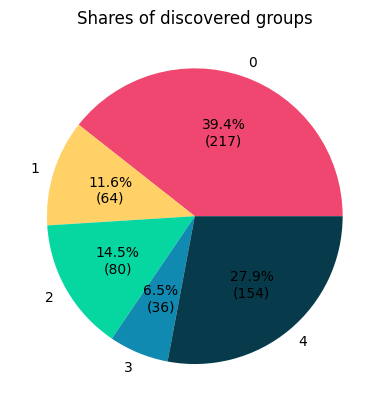




## Data ingestion

In [ ]:
import pandas as pd

data = pd.read_csv('https://drive.google.com/uc?id=1wmtMusQYWSMK7tVspqUUdrDBCM80BRCT', encoding='ISO-8859-1')
data['income'] = data['income'].str.replace(',', '').astype(float)

print(f"Total number of records: {data.shape[0]}, total number of columns: {data.shape[1]}")

Total number of records: 8378, total number of columns: 195


## Data exploration
In the first step we try to take a closer look at basic statistics of each feature column.

In [ ]:
!pip install sweetviz -qq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.1 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

general_report = sv.analyze(data, pairwise_analysis="off")
general_report.show_notebook()

## Data preprocessing

From the variery of features we pick a handful with few missing values (approx. 1%).
Following feature candidates were chosen:


*   **personal info**: age, race,
*   **beliefs and lifestyle** :
    - imprelig - importance of the same religious background of a partner
    - imprace - importance of the same racial background of a partner
    - date - frequency of participant's dates
    - goal - primary goal of participating in speed dates
*   **expectations of partner's character**:
    - attr1_1 - attractivness
    - sinc1_1 - sincerity
    - intel1_1 - inteligence
    - fun1_1 - sense of humour
    - amb1_1 - ambitions
    - share1_1 - shared interests

\+ addtional columns for data processing: iid and wave


In [ ]:
# pick a subset of dataframe with specified columns
chosen_columns = ['wave', 'iid', 'age', 'race', 'goal', 'imprace', 'imprelig', 'date', 'field_cd', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
data_subset = data.loc[:, chosen_columns].copy()
data_subset.head()

,wave,iid,age,race,goal,imprace,imprelig,date,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,1,21.0,4.0,2.0,2.0,4.0,7.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
1,1,1,21.0,4.0,2.0,2.0,4.0,7.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
2,1,1,21.0,4.0,2.0,2.0,4.0,7.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
3,1,1,21.0,4.0,2.0,2.0,4.0,7.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
4,1,1,21.0,4.0,2.0,2.0,4.0,7.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0


In [ ]:
# drop duplicated rows - each person appears in original df multiple times
data_subset = data_subset.drop_duplicates().sort_values("iid")
print(f"Number or rows reduced from {data.shape[0]} to {data_subset.shape[0]} ({data.shape[0]/data_subset.shape[0]:.1f} times)")

Number or rows reduced from 8378 to 551 (15.2 times)


In [ ]:
# display percent of NaNs in each column
stats = {"missing_count": data_subset.isna().sum(),
         "missing_percent": data_subset.isna().sum()/data_subset.iid.count()*100}
missing_stats= pd.DataFrame(stats).T
missing_stats.style

,wave,iid,age,race,goal,imprace,imprelig,date,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
missing_count,0.000000,0.000000,8.000000,6.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,9.000000,10.000000
missing_percent,0.000000,0.000000,1.451906,1.088929,1.270417,1.270417,1.270417,1.451906,1.270417,1.270417,1.270417,1.270417,1.451906,1.633394,1.814882


In [ ]:
# since the share of missing values is very low, we can interpolate by using most common value in each column
data_subset = data_subset.apply(lambda x:x.fillna(x.value_counts().index[0]))
# check if there are any NaNs left
stats = {"missing_count": data_subset.isna().sum(),
         "missing_percent": data_subset.isna().sum()/data_subset.iid.count()*100}
missing_stats= pd.DataFrame(stats).T
missing_stats.style

,wave,iid,age,race,goal,imprace,imprelig,date,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
missing_count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
missing_percent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# check how many records do not fit into 100 sum
data_subset['expectations_sum'] = data_subset.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].apply(sum, axis = 1)
data_subset[(~data_subset.expectations_sum.between(99,101))].head(15)
# it can be ignored, since the number of records is relatively small

,wave,iid,age,race,goal,imprace,imprelig,date,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,expectations_sum
580,2,44,24.0,2.0,1.0,3.0,3.0,3.0,3.0,25.0,15.0,25.0,25.0,15.0,15.0,120.0
908,3,66,29.0,3.0,2.0,1.0,1.0,6.0,8.0,20.0,25.0,15.0,15.0,53.0,20.0,148.0
918,3,67,22.0,6.0,6.0,1.0,1.0,5.0,1.0,20.0,15.0,20.0,20.0,5.0,10.0,90.0
1530,4,105,25.0,1.0,2.0,1.0,1.0,7.0,1.0,30.0,15.0,20.0,20.0,0.0,5.0,90.0
1816,5,129,27.0,2.0,3.0,1.0,1.0,3.0,8.0,40.0,20.0,20.0,20.0,10.0,10.0,120.0
1826,5,130,20.0,4.0,1.0,4.0,1.0,6.0,5.0,80.0,10.0,10.0,20.0,10.0,10.0,140.0
6506,16,427,28.0,2.0,1.0,1.0,1.0,7.0,13.0,20.0,20.0,20.0,20.0,20.0,20.0,120.0
7221,19,489,28.0,2.0,3.0,6.0,5.0,2.0,8.0,20.0,10.0,20.0,20.0,20.0,0.0,90.0
7586,21,517,30.0,3.0,5.0,1.0,1.0,5.0,15.0,15.0,20.0,20.0,20.0,5.0,10.0,90.0
7608,21,518,23.0,2.0,5.0,2.0,1.0,7.0,15.0,20.0,25.0,25.0,30.0,5.0,5.0,110.0


In [ ]:
# scale the data, but skip categorical cols
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
numerical_cols =  ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'imprace', 'imprelig']
ct = ColumnTransformer([
        ('somename', StandardScaler(), numerical_cols)
    ], remainder='passthrough')
data_subset_scaled = data_subset.copy()
data_subset_scaled.drop(columns="expectations_sum",inplace=True)
data_subset_scaled[numerical_cols] = StandardScaler().fit_transform(data_subset_scaled[numerical_cols])



## Clustering procedure

Let's try automated approach - silhouette scores and elbow method for within-cluster sum of squares


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# calculate Silhouette score for different k values
silhouette_scores = []
cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'imprace', 'imprelig']
training_data = data_subset_scaled[cols]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(training_data)
    silhouette_scores.append(silhouette_score(training_data, labels))

# find the best value of k based on the Silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"The optimal number of clusters is {best_k} with a Silhouette score of {max(silhouette_scores)}")
silhouette_scores

The optimal number of clusters is 2 with a Silhouette score of 0.20692111339386576


[0.20692111339386576,
 0.16968711019994942,
 0.1661111149530105,
 0.16942801178128095,
 0.15606373985944294,
 0.15023268971902357,
 0.14493102557553741,
 0.13898592678964933,
 0.14491006174563387]

The results obtained with silouette scored seem unrealistic - distinguishing only 2 groups won't let us discover any dominant preference about the partner.

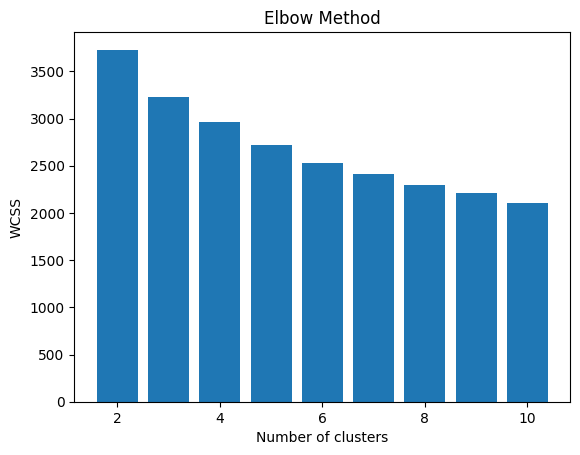

In [ ]:
# calculate WCSS for different k values
import seaborn as sns
import matplotlib.pyplot as plt
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(training_data)
    wcss.append(kmeans.inertia_)

# plot the elbow curve
plt.bar(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Judging from plotted bars, a number of 5 to 6 clusters appears to make any significant reduction of WCSS indicator. Making clustering too granular is not desired either, so **let's stick to k = 5**.

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'imprace', 'imprelig']
labels = kmeans.fit_predict(data_subset_scaled[cols])

## Result visualization

In [ ]:
df_viz = pd.DataFrame(data_subset_scaled,
                      columns = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',  'imprace', 'imprelig',])
df_viz['labels'] = labels
df_viz_ = df_viz.groupby('labels').mean().reset_index().melt(id_vars = ['labels'])

import plotly.express as px
fig = px.line_polar(df_viz_,
                    r = "value",
                    theta = "variable",
                    line_close = True,
                    color = "labels",
                    color_discrete_sequence = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"])


fig.update_layout(polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-2, 3]
    )),
  showlegend = True
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(

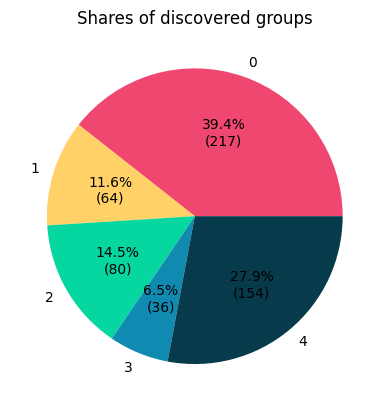

In [ ]:
import numpy as np
data_subset_scaled['label'] =labels
total = len(labels)
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
ax = plt.axes()
ax.pie(data_subset_scaled.label.value_counts().sort_index(), labels=np.unique(data_subset_scaled.label), autopct=my_fmt, colors = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"])
plt.title("Shares of discovered groups")
plt.show()

We obtained 5 groups:
*   **Group 0** - (39.4%) - most numerous, yet there's no dominant expectation about partner  
*   **Group 1** - (11.6%) - these folks on average are mostly attracted to intelligence of a partner
*   **Group 2** - (14.5%) - for those people a good sense of humour is a must
*   **Group 3** - (6.5%) - people super-focused on partner's attractivness, nothing else basically matters.
*   **Group 4** - (27.9%) - second largest group, members expect their partner to have similar background (race and religion)

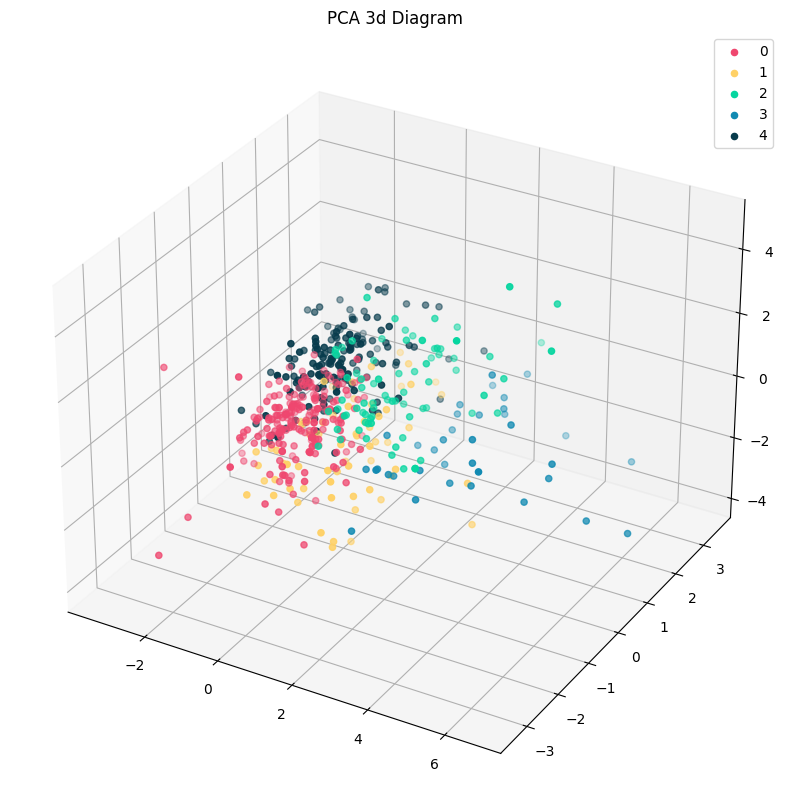

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# perform PCA
pca = PCA(n_components=3) #
data_subset_pca = pca.fit_transform(training_data)
data_subset_pca #Transformed dataset

#Getting it back into Pandas data frame
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2', 'PC3']),
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf

color_palette = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"]
# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
for i in range (0,5):
  ax.scatter3D(data_subset_tf[data_subset_tf.labels == i].PC1,
             data_subset_tf[data_subset_tf.labels == i].PC2,
             data_subset_tf[data_subset_tf.labels == i].PC3,
             color = color_palette[i], label = i)

plt.legend(loc="best")
plt.title("PCA 3d Diagram")
plt.show()


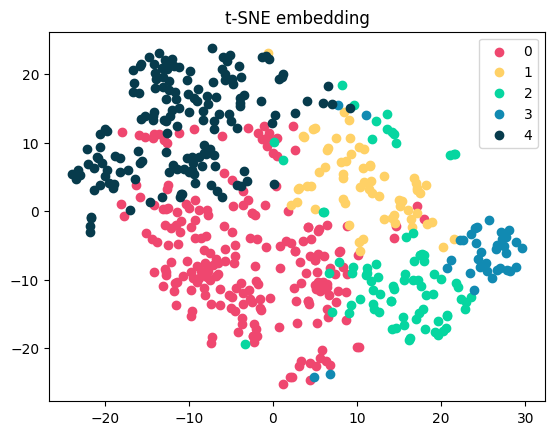

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
tsne = TSNE(n_components=2, random_state=42)
data_subset_tsne = tsne.fit_transform(training_data)
# Plot the results


# fig = plt.figure()
ax = plt.axes()
for i in range (0,5):
  ax.scatter(data_subset_tsne[data_subset_tf.labels == i,0], data_subset_tsne[data_subset_tf.labels == i,1],
             c = color_palette[i], label = i)
plt.title('t-SNE embedding')
plt.legend(loc="best")
plt.show()


## Detailed group analysis

In [ ]:
# get indices of each group's members
idx_table = []
for i in range(0,5):
  idx_table.append(data_subset_scaled[data_subset_scaled.label == i].index)

# additional info columns
feature_cols = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
                'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
                'movies', 'concerts', 'music', 'shopping', 'yoga']

def display_hobbies(df, indices, features):
    mean_series = df.loc[indices, features].mean().sort_values().values
    sorted_features = df.loc[indices, features].mean().sort_values().index
    median_series = df.loc[indices, sorted_features].median().values

    X_axis = np.arange(len(features))
    plt.figure(figsize=(20,5))
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--')
    plt.bar(X_axis - 0.2, median_series, 0.4, label = 'median')
    plt.bar(X_axis + 0.2, mean_series, 0.4, label = 'mean')

    plt.xticks(X_axis, sorted_features)
    plt.xlabel("Category")
    plt.ylabel("Rating")
    plt.title("Participants' hobbies")

    plt.legend()
    plt.show()

def report_statistics(df, indices):
    stats_df = df.loc[indices, ['gender', 'age', 'race', 'date', 'goal']].apply(lambda x: x.value_counts())
    stats_df = stats_df/stats_df.sum(axis=0) * 100
    # gender distribution
    print("gender (%)")
    print(stats_df.gender[0:1], "\n")
    # race distribution
    print("race (%)")
    print(stats_df.race[1:6], "\n")
    # dating frequency
    print(f"People dating at least once a week: {stats_df.date[1:3].sum():.1f}%")
    print(f"People dating once/twice a month: {stats_df.date[4:5].sum():.1f}%")
    print(f"People dating rarely or never: {stats_df.date[6:7].sum():.1f}% \n")
    # goal of participating in speed dates
    print(f"People want to have fun or/and meet new people: {stats_df.goal[1:2].sum():.1f}%")
    print(f"People actually look for date or relationship: {stats_df.goal[3:4].sum():.1f}%")
    print(f"People dating for other reasons: {stats_df.goal[5:].sum():.1f}% \n")


    df.age[indices]
    print(pd.cut(df.age[indices], [0, 20, 25, 30, 40], labels = ['below 20', '20-25', '25-30', '30+']).value_counts())

### Group 0 - "Normals"

* similar share of males and females
* dominant origins: European-Caucasian and Asian
* none of partner's features seems to be extraordinarily important
* mostly interested in culture: music, movies and reading
* **almost 50% of members date never to rarely!**
* majority of them looks for entertainment and new acquantiances rather than romantic relationship



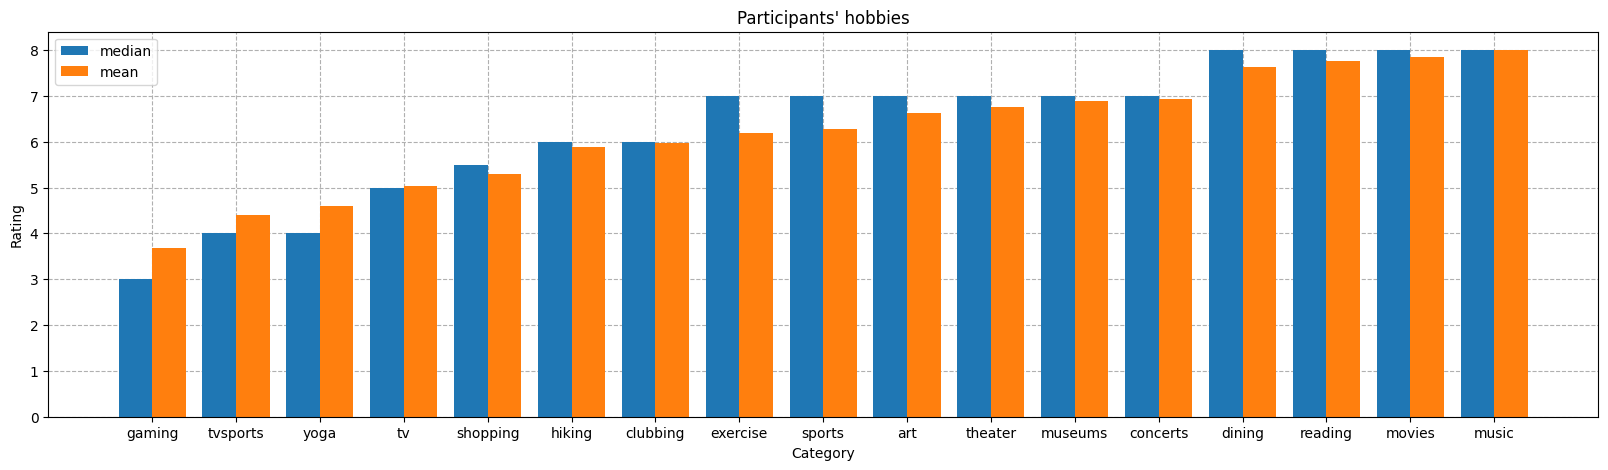

gender (%)
0.0    52.534562
1.0    47.465438
Name: gender, dtype: float64 

race (%)
1.0     6.161137
2.0    45.971564
3.0     8.056872
4.0    33.649289
5.0          NaN
6.0     6.161137
Name: race, dtype: float64 

People dating at least once a week: 14.3%
People dating once/twice a month: 37.1%
People dating rarely or never: 48.6% 

People want to have fun or/and meet new people: 77.6%
People actually look for date or relationship: 11.0%
People dating for other reasons: 11.4% 

25-30       97
20-25       87
30+         22
below 20     3
Name: age, dtype: int64


In [ ]:
display_hobbies(data, idx_table[0], feature_cols)
report_statistics(data, idx_table[0])

### Group 1 - "Intelectuals"

* similar share of males and females
* dominant origins: European-Caucasian
* they find partner's intelligence most important
* mostly interested in culture and entertainment: dining, movies and reading
* more than 60% of members date once a month or more frequently
* majority of them looks for entertainment and new acquantiances rather than romantic relationship



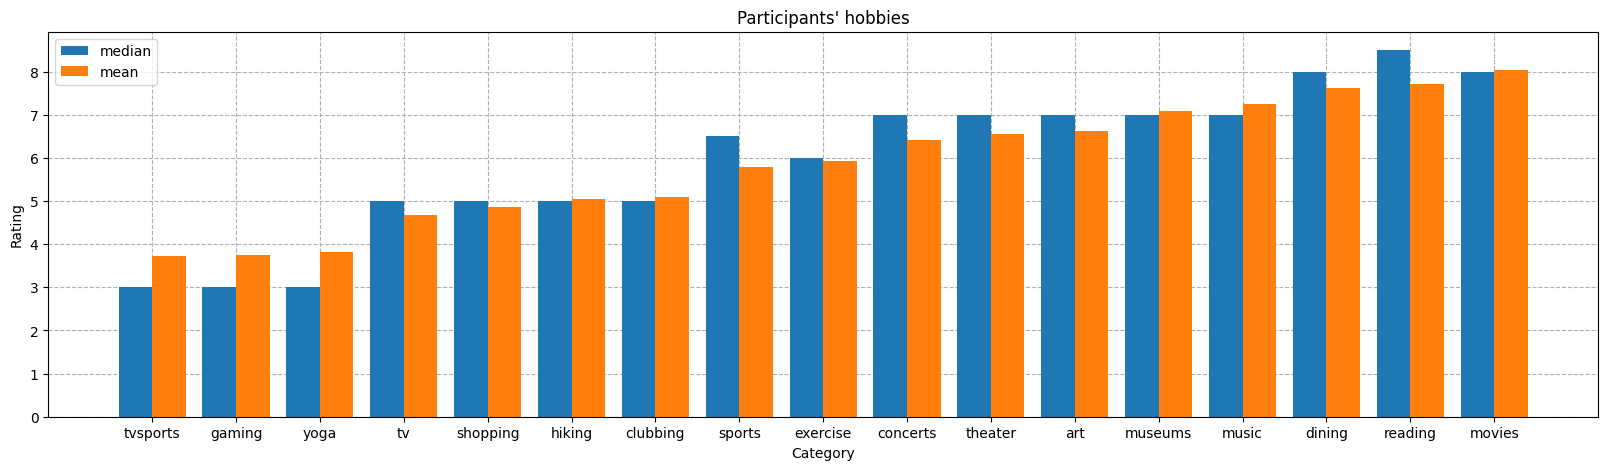

gender (%)
0.0    46.875
1.0    53.125
Name: gender, dtype: float64 

race (%)
1.0     1.5625
2.0    54.6875
3.0    17.1875
4.0    18.7500
5.0        NaN
6.0     7.8125
Name: race, dtype: float64 

People dating at least once a week: 10.9%
People dating once/twice a month: 50.0%
People dating rarely or never: 39.1% 

People want to have fun or/and meet new people: 65.6%
People actually look for date or relationship: 18.8%
People dating for other reasons: 15.6% 

25-30       27
20-25       26
30+         11
below 20     0
Name: age, dtype: int64


In [ ]:
display_hobbies(data, idx_table[1], feature_cols)
report_statistics(data, idx_table[1])

### Group 2 - "Jokers"

* 70% of members are males
* dominant origins: European-Caucasian
* partner's sense of humour is what makes their hearts beat faster
* nothing out-of-normal in terms of hobbies: music, movies and dining
* 50% of members date 1-2 times a month
* main goal:  entertainment and new acquantiances

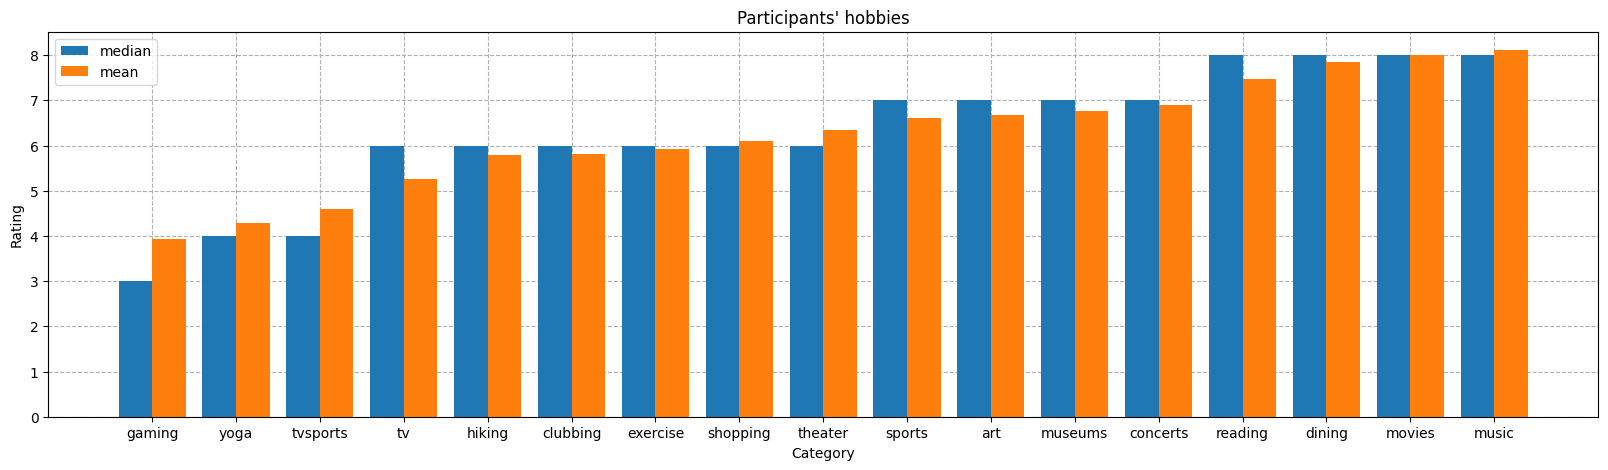

gender (%)
0.0    30.0
1.0    70.0
Name: gender, dtype: float64 

race (%)
1.0     5.00
2.0    66.25
3.0     6.25
4.0    13.75
5.0      NaN
6.0     8.75
Name: race, dtype: float64 

People dating at least once a week: 16.5%
People dating once/twice a month: 50.6%
People dating rarely or never: 32.9% 

People want to have fun or/and meet new people: 71.2%
People actually look for date or relationship: 10.0%
People dating for other reasons: 18.8% 

25-30       37
20-25       34
30+          5
below 20     2
Name: age, dtype: int64


In [ ]:
display_hobbies(data, idx_table[2], feature_cols)
report_statistics(data, idx_table[2])

### Group 3 - "Alvaros"

* dominant males share - above 80%
* dominant origins: European-Caucasian and Asian
* **the only thing that really matters is physical appearance**
* mostly interested in fitness - sports, exercises, dining and music
* **1/4 of them dates at least once a week, almost half - once/twice a month!**
* they are focused on meeting new people and having fun

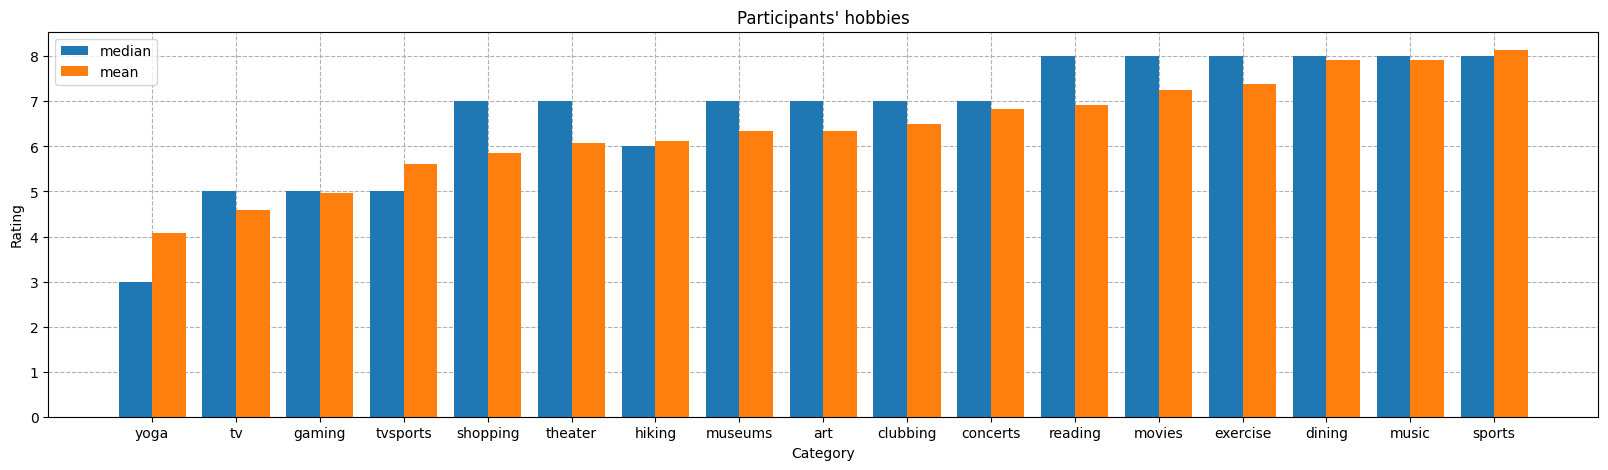

gender (%)
0.0    19.444444
1.0    80.555556
Name: gender, dtype: float64 

race (%)
1.0     2.777778
2.0    50.000000
3.0     5.555556
4.0    36.111111
5.0          NaN
6.0     5.555556
Name: race, dtype: float64 

People dating at least once a week: 25.0%
People dating once/twice a month: 47.2%
People dating rarely or never: 27.8% 

People want to have fun or/and meet new people: 75.0%
People actually look for date or relationship: 16.7%
People dating for other reasons: 8.3% 

25-30       19
20-25       14
below 20     3
30+          0
Name: age, dtype: int64


In [ ]:
display_hobbies(data, idx_table[3], feature_cols)
report_statistics(data, idx_table[3])

### Group 4 - "Conservatives"

* 2/3 of them are females
* dominant origins: European-Caucasian
* **they look for partner with similar religious and ethnic background**
* mostly interested in culture - movies, dining, music and reading
* **43% date super rarely or never, another 2/5 on and off**
* they don't seem to treat speed dating as entrypoint to serious relationship

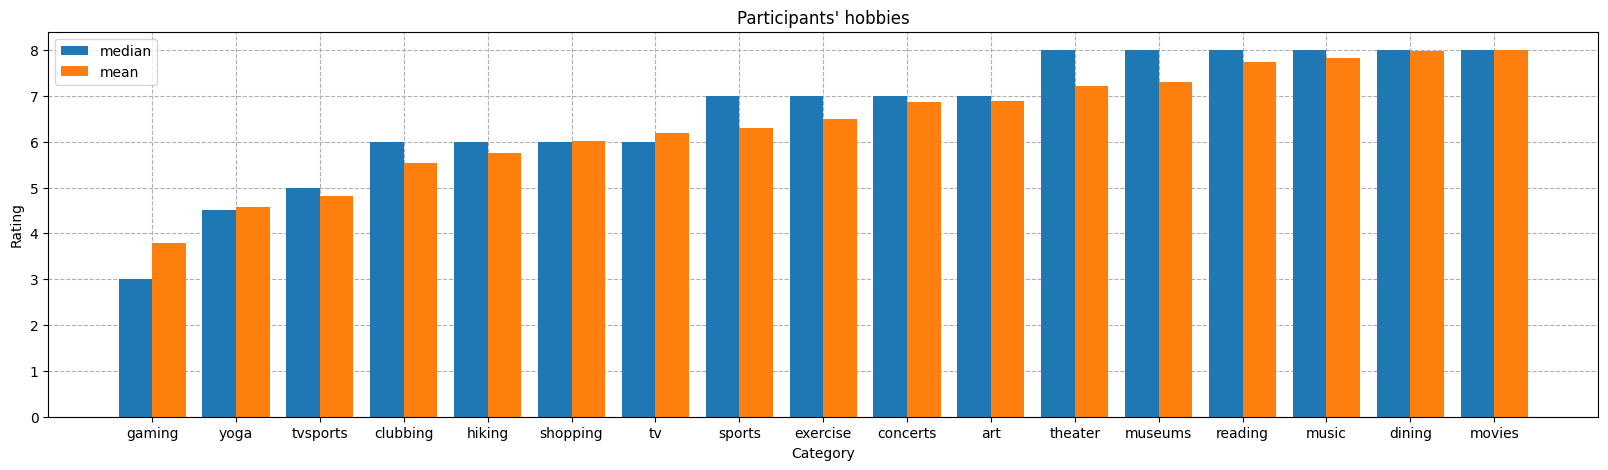

gender (%)
0.0    64.285714
1.0    35.714286
Name: gender, dtype: float64 

race (%)
1.0     4.545455
2.0    65.584416
3.0     4.545455
4.0    18.831169
5.0          NaN
6.0     6.493506
Name: race, dtype: float64 

People dating at least once a week: 15.6%
People dating once/twice a month: 40.9%
People dating rarely or never: 43.5% 

People want to have fun or/and meet new people: 83.1%
People actually look for date or relationship: 8.4%
People dating for other reasons: 8.4% 

20-25       72
25-30       66
30+         16
below 20     0
Name: age, dtype: int64


In [ ]:
display_hobbies(data, idx_table[4], feature_cols)
report_statistics(data, idx_table[4])

### Income analysis

Almost 50% of records have missing income data, so this analysis is not reliable

In [ ]:
data.loc[data_subset_scaled.index, "label"] = labels
income_df = data.loc[data_subset_scaled.index, ["income", 'label']]
income_df = income_df.sort_values("label")
print(f"Missing income data for {income_df['income'].isna().sum()} records")
income_df['income'] = income_df['income'].replace(',', '').astype(float)
import plotly.express as px
fig = px.histogram(income_df, x="income", color="label", color_discrete_sequence = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"], nbins=6, title="Income distribution")
fig.show()


Missing income data for 270 records


### Field of study
Judging from a histogram plot below, the most popular field of study among all participants was *Business/Econ/Financ*e followed by *Biological Sciences/Chemistry/Physics*


In [ ]:
field_df = data.loc[data_subset_scaled.index, ["field_cd", 'label']]
field_df.sort_values("label", inplace=True)
import plotly.express as px
fig = px.histogram(field_df, x="field_cd", color="label", color_discrete_sequence = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"],  title="Field of study", barmode="overlay")
fig.show()